api example. the code below can be executed remotely from a windows laptop.
1. adjust the pi_address below. 
2. run the cells one by one, pick what you need.

In [1]:
from PIL import Image
from io import BytesIO
import numpy as np
import requests
from pprint import pprint

# in usb mode:
# pi_address = 'raspberrypi.local'
# in network mode:
# pi_address = '10.61.100.177'
# ADJUST THIS LINE
pi_address = '10.61.100.209'

In [2]:
# get some info
r = requests.get(f'http://{pi_address}:8000/info')
#print(r.json()['sensor_modes'])
pprint(r.json()['cam_info'])
print('\n')
info = r.json()['sensor_modes']

for iter, data in enumerate(info):
   pprint(f'mode {iter} is {data}')



ConnectionError: HTTPConnectionPool(host='10.61.100.209', port=8000): Max retries exceeded with url: /info (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f5f0c9a30>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [3]:
# have a look at the current controls
r = requests.get(f'http://{pi_address}:8000/controls')
controls = r.json()
pprint(controls)


{'amount': 10,
 'analog_gain': '1',
 'apply': False,
 'cam_close': True,
 'cam_open': False,
 'download': False,
 'download_option': 'zip',
 'exposure_us': '1000.00',
 'framerate': '30.00',
 'illumination': 'off',
 'mode': '0'}


In [34]:
# replace the current controls
controls['exposure_us']=300
r = requests.put(f'http://{pi_address}:8000/controls', json = controls)
pprint(r.content)


(b'{"amount":1,"analog_gain":1.0,"exposure_us":300,"framerate":30,"illumination'
 b'":true,"mode":0}\n')


In [35]:
# replace single controls
controls['exposure_us']=100
r = requests.put(f'http://{pi_address}:8000/controls/', json = controls)
print(r)

# replace single controls
controls['analog_gain']=1
r = requests.put(f'http://{pi_address}:8000/controls/', json = controls)
print(r)
# replace single controls
controls['framerate']=50
r = requests.put(f'http://{pi_address}:8000/controls/', json = controls)
print(r)
# replace single controls
controls['mode']=1
r = requests.put(f'http://{pi_address}:8000/controls/', json = controls)
print(r)
# r = requests.get(f'http://{pi_address}:8000/index')
# print(r.content)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [36]:
# replace the current controls
controls['amount']=10
r = requests.put(f'http://{pi_address}:8000/controls', json = controls)
print(r.content)

b'{"amount":10,"analog_gain":1,"exposure_us":100,"framerate":50,"illumination":true,"mode":1}\n'


In [37]:
import time
from numpy.lib.npyio import NpzFile 

r = requests.get(f'http://{pi_address}:8000/capturefast')
print(r.json)

ret = NpzFile(BytesIO(r.content), own_fid=True, allow_pickle=True)  
print(ret.files)  
""" ['A'] """  
print(ret['A'].shape)  
""" (10,400,400) """  
print(ret['A'])

<bound method Response.json of <Response [200]>>
['A']
(10, 400, 400)
[[[1390 1393 1369 ... 1416 1421 1449]
  [1410 1354 1352 ... 1417 1407 1425]
  [1398 1363 1382 ... 1381 1430 1420]
  ...
  [1347 1279 1314 ... 1276 1267 1320]
  [1330 1341 1331 ... 1284 1280 1328]
  [1341 1337 1309 ... 1311 1314 1299]]

 [[1373 1419 1363 ... 1440 1388 1396]
  [1351 1356 1361 ... 1425 1374 1410]
  [1399 1339 1403 ... 1408 1402 1368]
  ...
  [1340 1332 1330 ... 1311 1355 1278]
  [1408 1342 1329 ... 1347 1315 1338]
  [1342 1308 1332 ... 1273 1308 1280]]

 [[1371 1413 1416 ... 1412 1423 1390]
  [1373 1376 1406 ... 1387 1406 1434]
  [1363 1380 1431 ... 1411 1411 1413]
  ...
  [1342 1331 1369 ... 1280 1292 1317]
  [1337 1337 1373 ... 1280 1354 1291]
  [1283 1309 1347 ... 1323 1283 1303]]

 ...

 [[1398 1396 1403 ... 1425 1367 1382]
  [1381 1366 1411 ... 1375 1357 1421]
  [1356 1357 1411 ... 1409 1353 1411]
  ...
  [1314 1325 1367 ... 1314 1302 1335]
  [1328 1319 1366 ... 1297 1322 1331]
  [1322 1249 1297 ..

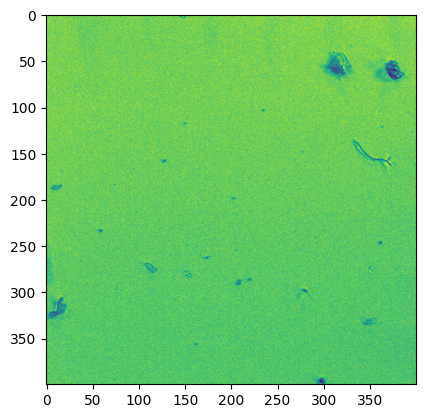

In [38]:
import matplotlib.pyplot as plt
plt.imshow(ret['A'][0])
plt.show()

In [26]:
#direct i2c access.
import subprocess
frames =100
t = time.time()
for i in range(frames):
    out = subprocess.check_output(r"i2cset -f -y 10 0x36 0x01 0xE5; i2cget -f -y 10 0x36", shell=True)
    t2 = time.time()

print("program output:", out)

print(t2-t)
print(f'regs per sec: {frames/(t2-t)}')



program output: b'0x00\n'
2.4648795127868652
regs per sec: 40.56993434414856


exp_val = i2c.rwReg(addr=0xE000, value=0x0, rw=1, flag=0) # WRITE bank sel 0

exp_val_3 = i2c.rwReg(addr=0x193, value=0x44, rw=0, flag=0) # offset clipping registers 
exp_val_4 = i2c.rwReg(addr=0x194, value=0x16, rw=0, flag=0)

print(f'offsetclip value in hex:  {hex(exp_val_3)} {hex(exp_val_4)}')
print(f'offsetclip val in decimal: { 256* (exp_val_3) + (exp_val_4)}')

exp_val_3 = i2c.rwReg(addr=92, value=0, rw=0, flag=0) # offset clipping registers 
exp_val_4 = i2c.rwReg(addr=93, value=0, rw=0, flag=0)

print(f'offsetclip value in hex:  {hex(exp_val_3)} {hex(exp_val_4)}')
print(f'offsetclip val in decimal: { 256* (exp_val_3) + (exp_val_4)}')

In [ ]:
# WRITE REGISTER EXAMPLE
message = {"reg": "0xE000", "val": "0x0"}
r = requests.put(f'http://{pi_address}:8000/registers/write', json = message)
print(r.content)


# READ REGISTER EXAMPLE
message = {"reg": "0x193"}
r = requests.put(f'http://{pi_address}:8000/registers/read', json = message)
print(r.content)


# READ REGISTER EXAMPLE
message = {"reg": "0x194"}
r = requests.put(f'http://{pi_address}:8000/registers/read', json = message)
print(r.content)

In [ ]:
# WRITE REGISTER EXAMPLE
message = {"reg": "0x100d", "val": "0x2"}
r = requests.put(f'http://{pi_address}:8000/registers/write', json = message)
print(r.content)

# ENABLE MANUAL MODE (disable reg upload and reset)
message = {"enable": "1"}
r = requests.put(f'http://{pi_address}:8000/registers/manual_mode', json = message)
print(r.content)

# DISABLE MANUAL MODE (disable reg upload and reset)
message = {"enable": "0"}
r = requests.put(f'http://{pi_address}:8000/registers/manual_mode', json = message)
print(r.content)

# ENABLE STREAM CONTROL (while in manual mode, still let picam2 write start/stop stream register)
message = {"enable": "1"}
r = requests.put(f'http://{pi_address}:8000/registers/stream_ctrl', json = message)
print(r.content)

# (default) DISABLE STREAM CONTROL (while in manual mode, user manually write start/stop stream register)
message = {"enable": "0"}
r = requests.put(f'http://{pi_address}:8000/registers/manual_mode', json = message)
print(r.content)

# DISABLE POWER EXAMPLE (reset pin)
message = {"enable": "0"}
r = requests.put(f'http://{pi_address}:8000/registers/power', json = message)
print(r.content)

# ENABLE POWER EXAMPLE
message = {"enable": "1"}
r = requests.put(f'http://{pi_address}:8000/registers/power', json = message)
print(r.content)